<a href="https://colab.research.google.com/github/Parinita-Jain/DeepLearning/blob/main/ANNC_on_churn_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
from tensorflow.keras import Sequential #helps me to initialise the ann
from tensorflow.keras.layers import Dense #helps me to create HL
from sklearn.metrics import classification_report 

In [3]:
df = pd.read_csv("Churn_Modelling.csv") #task is to predict if customer will exit the bank,encoding= 'unicode_escape'
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
x = df.iloc[:,3:-1].values
y = df.iloc[:, -1].values

In [5]:
x

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [6]:
y

array([1, 0, 1, ..., 1, 1, 0])

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le1 = LabelEncoder()

x[:, 1] = le.fit_transform(x[:, 1])
x[:, 2] = le1.fit_transform(x[:, 2])


In [8]:
x

array([[619, 0, 0, ..., 1, 1, 101348.88],
       [608, 2, 0, ..., 0, 1, 112542.58],
       [502, 0, 0, ..., 1, 0, 113931.57],
       ...,
       [709, 0, 0, ..., 0, 1, 42085.58],
       [772, 1, 1, ..., 1, 0, 92888.52],
       [792, 0, 0, ..., 1, 0, 38190.78]], dtype=object)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [10]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3, random_state=1)

In [11]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

xtrain = sc.fit_transform(xtrain)

xtest = sc.transform(xtest)

In [12]:
#step1 -: initialise the ann model
ann = Sequential()

#step2 -: add layers into the model
ann.add(Dense(units=6, activation="relu"))         #relu => linear rectified unit.
# units =6 , is 6 neurons..is just some random no.. activation is activation func relu--this we will see in next chapter
# relu is recommended for hidden layers in case of classification

ann.add(Dense(units=1, activation="sigmoid"))
#for output layer sigmoid func is used for classification

#step3 -: establish the connection between the layers i.e. i/p and neurons and o/p
ann.compile(optimizer= "adam", loss="binary_crossentropy", metrics=["accuracy"])
# just like gradient descednt we will used adam as optimization which is the advance version of gradient descent
# by default adam use rmsprop
# loss is error rate of each batch and matrix is accuracy of each batch
#step4 -: train the model

ann.fit(xtrain, ytrain, batch_size=30, epochs=100)  #training our model

#step5 -: make prediction
ypred = ann.predict(xtest)

Epoch 1/100
234/234 [==============================] - 1s 2ms/step - loss: 0.6100 - accuracy: 0.6703
Epoch 2/100
234/234 [==============================] - 0s 2ms/step - loss: 0.4967 - accuracy: 0.7977
Epoch 3/100
234/234 [==============================] - 0s 2ms/step - loss: 0.4508 - accuracy: 0.8087
Epoch 4/100
234/234 [==============================] - 0s 2ms/step - loss: 0.4273 - accuracy: 0.8134
Epoch 5/100
234/234 [==============================] - 0s 2ms/step - loss: 0.4145 - accuracy: 0.8190
Epoch 6/100
234/234 [==============================] - 0s 2ms/step - loss: 0.4057 - accuracy: 0.8261
Epoch 7/100
234/234 [==============================] - 0s 2ms/step - loss: 0.3988 - accuracy: 0.8299
Epoch 8/100
234/234 [==============================] - 0s 2ms/step - loss: 0.3921 - accuracy: 0.8339
Epoch 9/100
234/234 [==============================] - 0s 2ms/step - loss: 0.3859 - accuracy: 0.8407
Epoch 10/100
234/234 [==============================] - 0s 2ms/step - loss: 0.3804 - accura

In [13]:
ypred

array([[0.04666197],
       [0.0901792 ],
       [0.08547774],
       ...,
       [0.02038374],
       [0.07201259],
       [0.10142639]], dtype=float32)

In [14]:
#step6 -: set the threshold
ypred = ypred>0.5

In [15]:
ypred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [16]:
#step7 -: get the report
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2373
           1       0.78      0.47      0.58       627

    accuracy                           0.86      3000
   macro avg       0.83      0.72      0.75      3000
weighted avg       0.85      0.86      0.85      3000



In [17]:
df["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [18]:
from sklearn.linear_model import LogisticRegression #just checking ML model accuracy

logreg = LogisticRegression()

logreg.fit(xtrain, ytrain)

ypred = logreg.predict(xtest)

print(classification_report(ytest, ypred))

#dl is efficient.

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      2373
           1       0.64      0.18      0.28       627

    accuracy                           0.81      3000
   macro avg       0.73      0.58      0.59      3000
weighted avg       0.78      0.81      0.76      3000



In [23]:
model=tf.keras.Sequential(
    [tf.keras.layers.Input(shape=(xtrain.shape[1],)),
     tf.keras.layers.Dense(1,activation="sigmoid")]
)
model.compile(optimizer= "adam", loss="binary_crossentropy", metrics=["accuracy"])

trained_model=model.fit(xtrain, ytrain, batch_size=30, epochs=100)

Epoch 1/100
234/234 [==============================] - 1s 1ms/step - loss: 0.7688 - accuracy: 0.5084
Epoch 2/100
234/234 [==============================] - 0s 1ms/step - loss: 0.6393 - accuracy: 0.6244
Epoch 3/100
234/234 [==============================] - 0s 2ms/step - loss: 0.5616 - accuracy: 0.7491
Epoch 4/100
234/234 [==============================] - 0s 1ms/step - loss: 0.5156 - accuracy: 0.7907
Epoch 5/100
234/234 [==============================] - 0s 1ms/step - loss: 0.4874 - accuracy: 0.8030
Epoch 6/100
234/234 [==============================] - 0s 1ms/step - loss: 0.4695 - accuracy: 0.8064
Epoch 7/100
234/234 [==============================] - 0s 1ms/step - loss: 0.4577 - accuracy: 0.8073
Epoch 8/100
234/234 [==============================] - 0s 1ms/step - loss: 0.4497 - accuracy: 0.8073
Epoch 9/100
234/234 [==============================] - 0s 1ms/step - loss: 0.4443 - accuracy: 0.8073
Epoch 10/100
234/234 [==============================] - 0s 1ms/step - loss: 0.4406 - accura

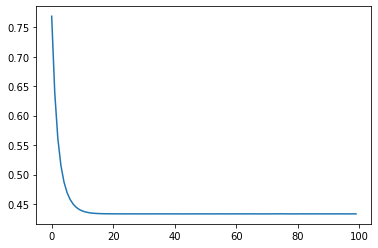

In [24]:
"""
The output of the above code displays how the loss function value changes with each epoch.
"""

plt.plot(trained_model.history['loss'])
plt.show()

In [25]:
y_pred=model.predict(xtest)

94/94 [==============================] - 0s 990us/step
